# Arbres de décision, sélection de modèles

In [4]:
import numpy as np
import decisiontree
import pickle
from collections import Counter
from decisiontree import DecisionTree
import matplotlib.pyplot as plt

## Entropie

### 1)

In [3]:
def entropie(vect):
    """
    Permet de calculer l'entropie d'un vecteur
    """
    entropie=0
    total = len(vect)
    tmp = dict(Counter(vect))
    for v in tmp.values():
        p = v/total
        entropie += p*np.log(p)
    return -entropie

### 2)

In [13]:
def entropie_cond(list_vect):
    """
    Permet de calculer l'entropie d'une partition de vecteur
    """
    taille = 0
    res = 0
    for vect in list_vect:
        tailleVect = len(vect)
        res += tailleVect*entropie(vect)
        taille += tailleVect
    return res/taille

### 3)

In [2]:
# data : tableau(films, features), id2titles : dictionnaire id -> titre,
# fields : id feature -> nom
[data, id2titles, fields] = pickle.load(open("imdb_extrait.pkl","rb"))
# la derniere colonne est le vote
datax = data[:, :32]
datay = np.array([1 if x [33] >6.5 else -1 for x in data ])

## Expériences préliminaires

### 4)

In [8]:
dt = DecisionTree()
dt.max_depth = 5 # on fixe la taille de l’arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5, :])
print(dt.score(datax, datay))
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("tmp/test_tree.pdf", fields)
# sinon utiliser http://www.webgraphviz.com/
dt.to_dot(fields)
# ou dans la console
print(dt.print_tree(fields))

0.736429038587312
var Drama :  > 0.500000 
	var budget :  > 15660000.000000 
		var Duree :  > 115.500000 
			var budget :  > 36500000.000000 
				var Duree :  > 137.500000 
					class : 1 {1: 101, -1: 20}
				var Duree :  <= 137.500000 
					class : 1 {-1: 94, 1: 109}
			var budget :  <= 36500000.000000 
				var Sci-Fi :  > 0.500000 
					class : -1 {-1: 5, 1: 4}
				var Sci-Fi :  <= 0.500000 
					class : 1 {1: 252, -1: 31}
		var Duree :  <= 115.500000 
			var Biography :  > 0.500000 
				var annee :  > 2011.500000 
					class : -1 {-1: 2}
				var annee :  <= 2011.500000 
					class : 1 {1: 24, -1: 2}
			var Biography :  <= 0.500000 
				var Thriller :  > 0.500000 
					class : -1 {-1: 162, 1: 66}
				var Thriller :  <= 0.500000 
					class : -1 {1: 135, -1: 149}
	var budget :  <= 15660000.000000 
		var annee :  > 1973.500000 
			var Duree :  > 104.500000 
				var budget :  > 11158052.500000 
					class : 1 {1: 131, -1: 39}
				var budget :  <= 11158052.500000 
					class : 1 {-1: 25,

In [7]:
dt = DecisionTree()
dt.max_depth = 2 
dt.min_samples_split = 2 
dt.fit(datax, datay)
dt.score(datax, datay)
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("tmp/test_tree2.pdf", fields)
# sinon utiliser http://www.webgraphviz.com/
dt.to_dot(fields)
# ou dans la console
print(dt.print_tree(fields))

var Drama :  > 0.500000 
	var budget :  > 15660000.000000 
		class : 1 {1: 691, -1: 465}
	var budget :  <= 15660000.000000 
		class : 1 {1: 923, -1: 190}
var Drama :  <= 0.500000 
	var annee :  > 1984.500000 
		class : -1 {-1: 1264, 1: 735}
	var annee :  <= 1984.500000 
		class : 1 {1: 253, -1: 66}



In [8]:
dt = DecisionTree()
dt.max_depth = 5 
dt.min_samples_split = 2 
dt.fit(datax, datay)
dt.score(datax, datay)
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("tmp/test_tree3.pdf", fields)
# sinon utiliser http://www.webgraphviz.com/
dt.to_dot(fields)
# ou dans la console
print(dt.print_tree(fields))

var Drama :  > 0.500000 
	var budget :  > 15660000.000000 
		var Duree :  > 115.500000 
			var budget :  > 36500000.000000 
				var Duree :  > 137.500000 
					class : 1 {1: 101, -1: 20}
				var Duree :  <= 137.500000 
					class : 1 {-1: 94, 1: 109}
			var budget :  <= 36500000.000000 
				var Sci-Fi :  > 0.500000 
					class : -1 {-1: 5, 1: 4}
				var Sci-Fi :  <= 0.500000 
					class : 1 {1: 252, -1: 31}
		var Duree :  <= 115.500000 
			var Biography :  > 0.500000 
				var annee :  > 2011.500000 
					class : -1 {-1: 2}
				var annee :  <= 2011.500000 
					class : 1 {1: 24, -1: 2}
			var Biography :  <= 0.500000 
				var Thriller :  > 0.500000 
					class : -1 {-1: 162, 1: 66}
				var Thriller :  <= 0.500000 
					class : -1 {1: 135, -1: 149}
	var budget :  <= 15660000.000000 
		var annee :  > 1973.500000 
			var Duree :  > 104.500000 
				var budget :  > 11158052.500000 
					class : 1 {1: 131, -1: 39}
				var budget :  <= 11158052.500000 
					class : 1 {-1: 25, 1: 321}
			var Du

In [9]:
dt = DecisionTree()
dt.max_depth = 9 
dt.min_samples_split = 2 
dt.fit(datax, datay)
dt.score(datax, datay)
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
dt.to_pdf("tmp/test_tree4.pdf", fields)
# sinon utiliser http://www.webgraphviz.com/
dt.to_dot(fields)
# ou dans la console
print(dt.print_tree(fields))

var Drama :  > 0.500000 
	var budget :  > 15660000.000000 
		var Duree :  > 115.500000 
			var budget :  > 36500000.000000 
				var Duree :  > 137.500000 
					var Western :  > 0.500000 
						class : -1 {-1: 2}
					var Western :  <= 0.500000 
						var budget :  > 112500000.000000 
							var budget :  > 127500000.000000 
								var budget :  > 160000000.000000 
									class : 1 {1: 5}
								var budget :  <= 160000000.000000 
									class : 1 {1: 5, -1: 3}
							var budget :  <= 127500000.000000 
								class : -1 {-1: 3}
						var budget :  <= 112500000.000000 
							var Comedy :  > 0.500000 
								var annee :  > 2003.000000 
									class : -1 {-1: 3, 1: 1}
								var annee :  <= 2003.000000 
									class : 1 {1: 3}
							var Comedy :  <= 0.500000 
								var budget :  > 82500000.000000 
									class : 1 {1: 26}
								var budget :  <= 82500000.000000 
									class : 1 {1: 61, -1: 9}
				var Duree :  <= 137.500000 
					var Romance :  > 0.500000 
						var an

## 5)

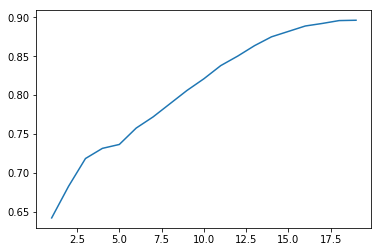

In [6]:
dt = DecisionTree()
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
X=list(range(1,20))
Y=[]
for prof in X:
    dt.max_depth = prof
    dt.fit(datax, datay)
    Y.append(dt.score(datax, datay))
    
plt.plot(X,Y)

Les scores augmentent avec la profondeur de l'arbre car l'apprentissage et le test se basent sur le même jeu de données. Ainsi, plus la profondeur est importante, plus on colle avec les données d'apprentissage ("apprentissage par coeur" ou sur apprentissage).

### 6)

Ces scores ne sont donc pas un indicateur fiable du comportement de l'algorithme sur des données réels. En effet, la généralisation se fera mal.
<br/><br/>
Pour obtenir un indicateur fiable, il faut séparer les données de test et d'apprentissage. Le but étant d'avoir assez de données pour bien apprendre, tout en ayant assez de données pour bien tester. Il faurdra aussi régler la condition d'arret du modèle (profondeur, entropie minimal, nombre d'élément à séparer).

## Sur et sous apprentissage

### 7)

In [10]:
def split(data, coef):
    """
    Permet de couper le jeu de données en une partie d'apprentissage ayant la proportion indiqué
    et une partie de test ayant la proportion restante.
    """
    # mélange des datas
    np.random.shuffle(data)
    # calcul de la limite entre le test et le train
    separation = int(len(data)*coef)
    
    # séparation des labels et des données
    datax = data[:, :32]
    datay = np.array([1 if x [33] >6.5 else -1 for x in data ])
    
    # récupération des données de train
    data_train = datax[:separation]
    labels_train = datay[:separation]
    
    # récupérations des données de test
    data_test = datax[separation:]
    labels_test = datay[separation:]
    
    return data_train, labels_train, data_test, labels_test

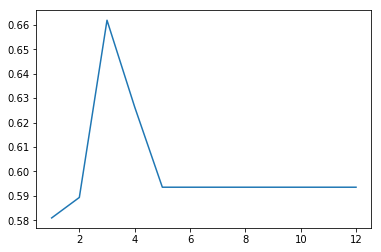

In [12]:
data_train, labels_train, data_test, labels_test = split(data, 0.01)
dt = DecisionTree()
dt.min_samples_split = 2
X=list(range(1,13))
Y=[]
for prof in X:
    dt.max_depth = prof
    dt.fit(data_train, labels_train)
    Y.append(dt.score(data_test, labels_test))
    
plt.plot(X,Y)

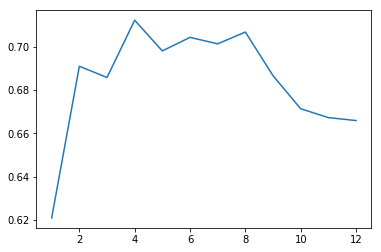

In [13]:
data_train, labels_train, data_test, labels_test = split(data, 0.2)
dt = DecisionTree()
dt.min_samples_split = 2
X=list(range(1,13))
Y=[]
for prof in X:
    dt.max_depth = prof
    dt.fit(data_train, labels_train)
    Y.append(dt.score(data_test, labels_test))
    
plt.plot(X,Y)

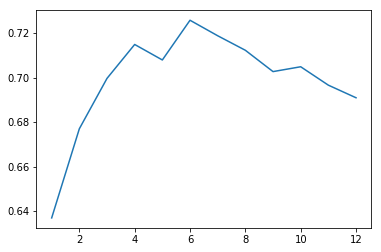

In [14]:
data_train, labels_train, data_test, labels_test = split(data, 0.5)
dt = DecisionTree()
dt.min_samples_split = 2
X=list(range(1,13))
Y=[]
for prof in X:
    dt.max_depth = prof
    dt.fit(data_train, labels_train)
    Y.append(dt.score(data_test, labels_test))
    
plt.plot(X,Y)

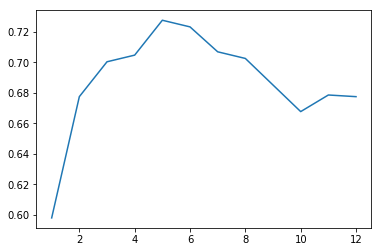

In [15]:
data_train, labels_train, data_test, labels_test = split(data, 0.8)
dt = DecisionTree()
dt.min_samples_split = 2
X=list(range(1,13))
Y=[]
for prof in X:
    dt.max_depth = prof
    dt.fit(data_train, labels_train)
    Y.append(dt.score(data_test, labels_test))
    
plt.plot(X,Y)

### 8)

Lorsqu'il y a peu d'exemples d'apprentissage, le modèle est moins performant. Lorsqu'il y a peu d'exemples de test, la qualité du modèle est mal estimé.

### 9)

L'objectif est d'utiliser le plus de données possibles pour apprendre tout en ayant assez de données pour tester la qualité du modèle à généraliser.<br/>
Un méthode pour faire ça est la validation croisée. On peut ainsi exploiter au maximum les données pour apprendre tout en ayant un bon recul sur la généralisation du modèle.

## Validation croisée : sélection de modèle

### 10)

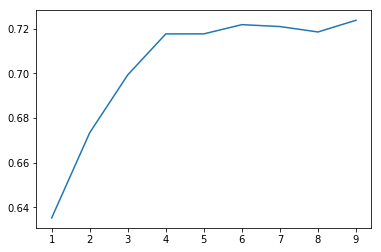

In [97]:
profMax = 9
dt = DecisionTree()
dt.min_samples_split = 2

# nombre de parties & taille d'une partie
N = 10
taille = int(len(data)/N)

# mélange des datas
np.random.shuffle(data)

# découpage en N parties de même taille
parties = [data[i*taille:(i+1)*taille] if i!=N-1 else data[i*taille:] for i in range(0, N)]

# calcul des différents arbres
X = list(range(1,profMax+1))
Y = []
for prof in X:
    
    scoreMoy = 0
    dt.max_depth = prof

    for i in range(N):
        # sélection des N-1 parties pour l'apprentissage & de la partie de test
        data_test = parties.pop(0)
        data_train = np.concatenate(parties, axis=0)
        
        # séparation des labels et des données
        dataX_train = data_train[:, :32]
        dataY_train = np.array([1 if x [33] >6.5 else -1 for x in data_train ])

        dataX_test = data_test[:, :32]
        dataY_test = np.array([1 if x [33] >6.5 else -1 for x in data_test ])

        # entrainement & calcul du score
        dt.fit(dataX_train, dataY_train)
        scoreMoy += dt.score(dataX_test, dataY_test)
        
        #en remets à la fin dans parties des data enlevé au début
        parties.append(data_test)
        
    Y.append(scoreMoy/N)
    
plt.plot(X,Y)
    